# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [66]:
import pandas as pd

In [67]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [69]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [70]:
X = pd.get_dummies(data, columns = ['occupation', 'occupation_husb', 'religious'])

In [71]:
X

,rate_marriage,age,yrs_married,children,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
5,4.0,27.0,9.0,0.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
6,5.0,37.0,23.0,5.5,12.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,5.0,37.0,23.0,5.5,12.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,3.0,22.0,2.5,0.0,12.0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
9,3.0,27.0,6.0,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [72]:
del X['affair']

In [73]:
y = data['affair']

In [74]:
model = LogisticRegression()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Обучаем модель

In [76]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [77]:
predictions = model.predict_proba(X_test)

In [78]:
for line in zip( predictions[:, 1], y_test ):
    print( line )

(0.6458320525452487, 0)
(0.07590618076898976, 0)
(0.2704607415690637, 0)
(0.2693857172367754, 0)
(0.2643341070336351, 1)
(0.14435916871294047, 0)
(0.17840884097304374, 0)
(0.21871788267036793, 0)
(0.7529308331348531, 1)
(0.2694633337999862, 0)
(0.11209934522012235, 0)
(0.18717066646841676, 0)
(0.0817875594488919, 0)
(0.3111212787891746, 0)
(0.7284472616460214, 1)
(0.5916696133374284, 0)
(0.28669594937812015, 0)
(0.721547426209314, 1)
(0.29496838667695774, 0)
(0.15667067620998537, 0)
(0.21615242656561326, 1)
(0.4623372483968881, 1)
(0.0768325266259968, 1)
(0.45802719118966956, 1)
(0.1764994483860008, 0)
(0.17432792939122524, 0)
(0.40764829875665953, 0)
(0.3799955222957636, 0)
(0.24757127156026143, 0)
(0.11183892854098085, 0)
(0.145155903934127, 0)
(0.3009918986116974, 1)
(0.20319590567173942, 0)
(0.4966685743037545, 1)
(0.6200900398354144, 1)
(0.3930464221888994, 1)
(0.1097296771061593, 0)
(0.18921428425286732, 0)
(0.287296269938157, 1)
(0.15184764917947957, 0)
(0.3784846975162414, 1)
(

(0.47142049565032806, 0)
(0.15869170582384906, 0)
(0.30970460219189555, 1)
(0.32762765178335523, 1)
(0.23895067962756225, 0)
(0.39465395355046423, 0)
(0.6649121554284902, 0)
(0.27852002310353013, 0)
(0.5550019248633468, 1)
(0.20939428310872887, 0)
(0.24070072683579502, 0)
(0.5711027918751077, 1)
(0.37284522918004276, 1)
(0.3479651574072557, 1)
(0.10439900569569807, 0)
(0.1837365870775898, 0)
(0.35050583421823583, 0)
(0.6028252621613668, 1)
(0.17229353078517629, 0)
(0.39108174443287663, 0)
(0.6552195911132127, 1)
(0.13788046443704993, 0)
(0.16910292075799116, 0)
(0.2649424012683054, 1)
(0.31924385309510367, 0)
(0.18643141372507177, 0)
(0.23351088538825013, 0)
(0.05028309373642753, 0)
(0.18669153862132018, 0)
(0.4949200631247456, 1)
(0.4378188814089446, 1)
(0.12309800838068077, 0)
(0.44628719965004127, 1)
(0.11121034386860769, 0)
(0.15258076657523506, 0)
(0.3718007320316051, 1)
(0.3431305599765229, 0)
(0.40511864922806595, 0)
(0.25457562906425263, 0)
(0.26957564731130956, 0)
(0.543257028

In [79]:
model.score(X_test, y_test)

0.7298429319371728

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [80]:
for x in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = x)
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

0.7329842931937173
0.7198952879581152
0.7204188481675393
0.7115183246073299
0.724607329842932
0.7115183246073299
0.7361256544502618
0.7240837696335078
0.7178010471204188


### Оценка качества модели

Считаем accuracy последней модели

In [81]:
model.score(X_test, y_test)

0.7178010471204188

In [89]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):

    if predicted_prob > 0.5:
        predicted = 1
    else:
        predicted = 0
        
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [90]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7178010471204188

In [91]:
precision = tp / (tp + fp)
precision

0.5621761658031088

In [92]:
model.score(X_test, y_test)

0.7178010471204188

### Используем готовые библиотеки

In [93]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [95]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [96]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.3086225026288118, 1.0, 0.038436799149681726)
(0.30825881115202525, 0.9982964224872232, 0.03889239611557025)
(0.30842105263157893, 0.9982964224872232, 0.03963586433332835)
(0.30858346498156924, 0.9982964224872232, 0.040502845384203914)
(0.3087460484720759, 0.9982964224872232, 0.04208424134883515)
(0.30890880337374804, 0.9982964224872232, 0.04300688480091025)
(0.3090717299578059, 0.9982964224872232, 0.04320643418412925)
(0.3092348284960422, 0.9982964224872232, 0.04481492908916826)
(0.3093980992608237, 0.9982964224872232, 0.045369227333628304)
(0.3090332805071315, 0.9965928449744463, 0.04567173861332409)
(0.3091966173361522, 0.9965928449744463, 0.04630948864727508)
(0.3093601269169751, 0.9965928449744463, 0.046658711946317016)
(0.30952380952380953, 0.9965928449744463, 0.046698272950581085)
(0.3098516949152542, 0.9965928449744463, 0.04771117427279097)
(0.31001589825119236, 0.9965928449744463, 0.04829855731961382)
(0.31018027571580065, 0.9965928449744463, 0.050179553343031855)
(0.3103448

(0.5450346420323325, 0.4020442930153322, 0.47706385607431956)
(0.5462962962962963, 0.4020442930153322, 0.47749454662232715)
(0.5452436194895591, 0.40034071550255534, 0.4789799102761235)
(0.5431235431235432, 0.3969335604770017, 0.47920040760029914)
(0.544392523364486, 0.3969335604770017, 0.4793461159374557)
(0.5456674473067916, 0.3969335604770017, 0.47992056314509995)
(0.5469483568075117, 0.3969335604770017, 0.4804197523560268)
(0.5458823529411765, 0.39522998296422485, 0.4805904862526128)
(0.5471698113207547, 0.39522998296422485, 0.480682110880709)
(0.5460992907801419, 0.393526405451448, 0.4808935596167841)
(0.5450236966824644, 0.39182282793867124, 0.48139187142267065)
(0.5463182897862233, 0.39182282793867124, 0.4821917212054206)
(0.5476190476190477, 0.39182282793867124, 0.4826215389988)
(0.548926014319809, 0.39182282793867124, 0.4827270938464456)
(0.5502392344497608, 0.39182282793867124, 0.48314971475111546)
(0.5515587529976019, 0.39182282793867124, 0.4835711340120031)
(0.5528846153846

In [97]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


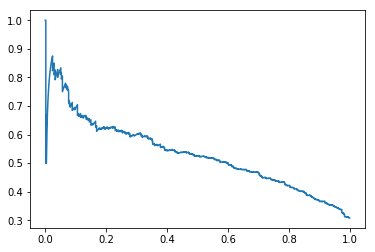

In [98]:
plt.plot( re, pr )

In [101]:
from sklearn.metrics import average_precision_score

In [102]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5321656913140679

### ROC

In [103]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [104]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [105]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0017035775127768314, 0.9487364180967183)
(0.0007558578987150416, 0.0017035775127768314, 0.900073489130051)
(0.0007558578987150416, 0.0034071550255536627, 0.8930327151417371)
(0.0015117157974300832, 0.0034071550255536627, 0.8927643241776698)
(0.0015117157974300832, 0.02385008517887564, 0.8753471977412379)
(0.0022675736961451248, 0.02385008517887564, 0.8742673053193443)
(0.0022675736961451248, 0.028960817717206135, 0.8561082324900624)
(0.0030234315948601664, 0.028960817717206135, 0.8549893060837601)
(0.0030234315948601664, 0.03236797274275979, 0.8499547413116773)
(0.003779289493575208, 0.03236797274275979, 0.8485188554780106)
(0.003779289493575208, 0.04088586030664395, 0.8430836084189124)
(0.0045351473922902496, 0.04088586030664395, 0.8422415652906384)
(0.0045351473922902496, 0.05110732538330494, 0.8341328261646804)
(0.005291005291005291, 0.05110732538330494, 0.8341040141903596)
(0.005291005291005291, 0.05281090289608177, 0.8321609307239319)
(0.006046863189720333, 0.0528109028960

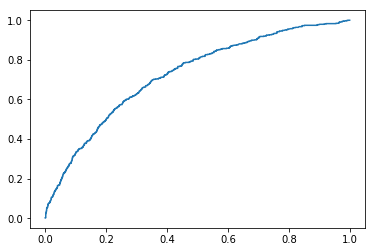

In [106]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [111]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [112]:
model2 = LogisticRegression()

In [113]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, y, test_size = 0.3, random_state = 0 )

In [114]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
predictions2 = model2.predict_proba( X_test_short )

In [116]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

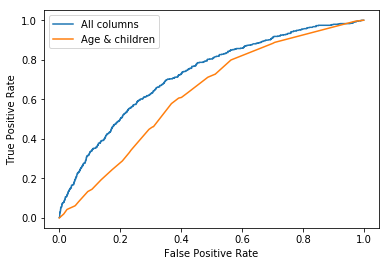

In [117]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5112470145564475

In [120]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [121]:
from sklearn.metrics import auc

In [122]:
auc( fpr, tpr )

0.7237931704955313

In [123]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [124]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [125]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [126]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [127]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

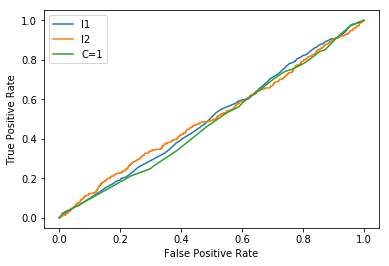

In [128]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [129]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [130]:
Y = data['affair']

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [132]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [133]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [134]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

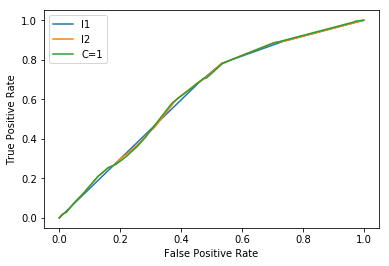

In [135]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()